In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
housing = pd.read_csv('dataset.csv')

In [5]:
housing.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
housing.shape

(545, 13)

In [8]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [12]:
housing.isnull().sum()*100/housing.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

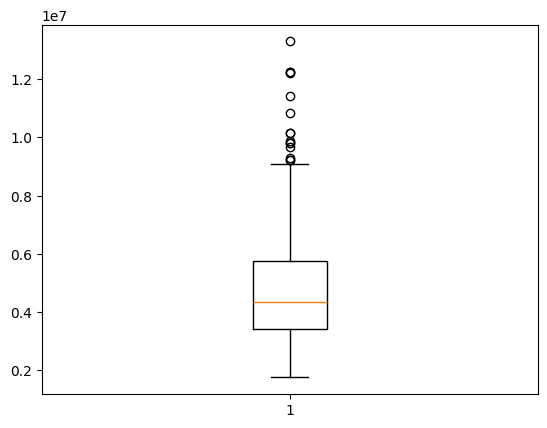

In [14]:
plt.boxplot(housing.price)
Q1=housing.price.quantile(0.25)
Q3=housing.price.quantile(0.75)
IQR=Q3-Q1
housing=housing[(housing.price >= Q1-1.5*IQR) & (housing.price <=Q3 +1.5*IQR)]

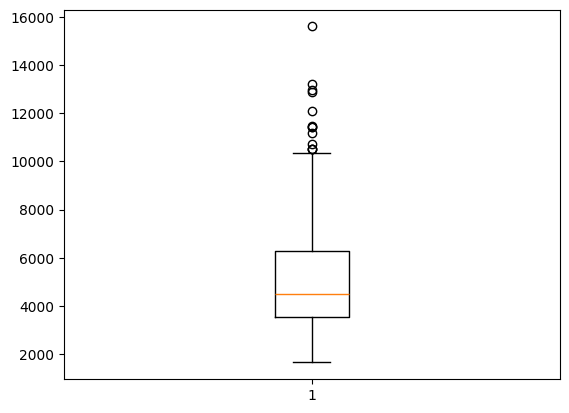

In [17]:
plt.boxplot(housing.area)
Q1=housing.price.quantile(0.25)
Q3=housing.price.quantile(0.75)
IQR=Q3-Q1
housing=housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]

In [18]:
varlist=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

In [19]:
def binary_map(x):
    return x.map({'yes':1,"no":0})

In [20]:
housing[varlist]=housing[varlist].apply(binary_map)

In [21]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,semi-furnished
21,8680000,7155,3,2,1,1,1,1,0,1,2,0,unfurnished
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,furnished
23,8645000,4560,3,2,2,1,1,1,0,1,1,0,furnished
24,8575000,8800,3,2,2,1,0,0,0,1,2,0,furnished


In [22]:
status = pd.get_dummies(housing['furnishingstatus'])

In [23]:
status.head()

,furnished,semi-furnished,unfurnished
20,False,True,False
21,False,False,True
22,True,False,False
23,True,False,False
24,True,False,False


In [24]:
status=pd.get_dummies(housing['furnishingstatus'],drop_first=True)
housing = pd.concat([housing,status],axis=1)

In [25]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,semi-furnished,True,False
21,8680000,7155,3,2,1,1,1,1,0,1,2,0,unfurnished,False,True
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,furnished,False,False
23,8645000,4560,3,2,2,1,1,1,0,1,1,0,furnished,False,False
24,8575000,8800,3,2,2,1,0,0,0,1,2,0,furnished,False,False


In [26]:
housing.drop(['furnishingstatus'],axis=1,inplace=True)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,True,False
21,8680000,7155,3,2,1,1,1,1,0,1,2,0,False,True
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,False,False
23,8645000,4560,3,2,2,1,1,1,0,1,1,0,False,False
24,8575000,8800,3,2,2,1,0,0,0,1,2,0,False,False


In [29]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test=train_test_split(housing,train_size=0.7,test_size=0.3,random_state=100)

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
scaler=MinMaxScaler()
num_vars=['area','bedrooms','bathrooms','stories','parking','price']

In [ ]:
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [32]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
391,3500000,3036,3,1,2,1,0,1,0,0,0,0,True,False
41,7840000,6360,3,2,4,1,0,0,0,1,0,1,False,False
175,5250000,9800,4,2,2,1,1,0,0,0,2,0,True,False
405,3465000,3060,3,1,1,1,0,0,0,0,0,0,False,True
218,4830000,4815,2,1,1,1,0,0,0,1,0,1,True,False


In [66]:
df_train.head()


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
391,3036,3,1,2,1,0,1,0,0,0,0,True,False
41,6360,3,2,4,1,0,0,0,1,0,1,False,False
175,9800,4,2,2,1,1,0,0,0,2,0,True,False
405,3060,3,1,1,1,0,0,0,0,0,0,False,True
218,4815,2,1,1,1,0,0,0,1,0,1,True,False


In [43]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [45]:
rfe=RFE(estimator=lm,n_features_to_select=6)
rfe.fit(x_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=6)

In [47]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('area', False, 8),
 ('bedrooms', False, 6),
 ('bathrooms', True, 1),
 ('stories', False, 3),
 ('mainroad', True, 1),
 ('guestroom', False, 4),
 ('basement', False, 2),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', False, 5),
 ('prefarea', True, 1),
 ('semi-furnished', False, 7),
 ('unfurnished', True, 1)]

In [49]:
col=x_train.columns[rfe.support_]
col

Index(['bathrooms', 'mainroad', 'hotwaterheating', 'airconditioning',
       'prefarea', 'unfurnished'],
      dtype='object')